In [1]:
using Random
using CSV
using MLJ
using MLJDecisionTreeInterface
using DecisionTree
using DelimitedFiles
using DataFrames
import DataFramesMeta as DFM

In [2]:
features_csv = "../../data/features.csv"
data, header = readdlm(features_csv, ',', header=true)
df = DataFrame(data, vec(header))

select!(df, Not([
    :CountHandWood,
    :CountHandBrick,
    :CountHandPasture,
    :CountHandStone,
    :CountHandGrain,
    :HasMostPoints,
    :CountVictoryPoint
    ]))

Row,CountSettlement,CountCity,CountRoad,SumWoodDiceWeight,SumBrickDiceWeight,SumPastureDiceWeight,SumStoneDiceWeight,SumGrainDiceWeight,CountPortWood,CountPortBrick,CountPortPasture,CountPortStone,CountPortGrain,CountTotalWood,CountTotalBrick,CountTotalPasture,CountTotalStone,CountTotalGrain,CountDevCardsKnight,CountDevCardsMonopoly,CountDevCardsYearOfPlenty,CountDevCardsRoadBuilding,CountDevCardsVictoryPoint,HasLargestArmy,HasLongestRoad,WonGame,CountTotalSettlement
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3.0,0.0,14.0,7.0,13.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,14.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1.0,1.0,5.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,4.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2.0,3.0,14.0,8.0,4.0,7.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,5.0,13.0,13.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0
4,2.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,2.0,0.0,14.0,7.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,2.0,0.0,14.0,7.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,25.0,3.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,2.0,0.0,6.0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,9.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,2.0,0.0,13.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
9,1.0,1.0,14.0,4.0,4.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,3.0,24.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
coerce!(df, :WonGame => Multiclass{2})
df = DFM.@transform(df, :WonGame)
df_train, df_test = partition(df, 0.1, rng=123)

y, X = unpack(df_train, ==(:WonGame));
y_test, X_test = unpack(df_test, ==(:WonGame));

In [ ]:
function get_features_labels(df, label=:WonGame)
    labels = df[!,label]
    features = Matrix(df[!, setdiff(names(df), [String(label)])])
    return labels, features
end

(labels, features) = get_features_labels(df_train)
(l_test, f_test) = get_features_labels(df_test)

#Matrix(df)
#labels = convert(Matrix, y)

(CategoricalArrays.CategoricalValue{Float64, UInt32}[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [2.0 0.0 … 0.0 2.0; 1.0 1.0 … 0.0 2.0; … ; 0.0 4.0 … 0.0 4.0; 2.0 0.0 … 0.0 2.0])

In [5]:
model = build_forest(labels, features)#, 2, 10, 0.5, 6)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 919.5
Avg Depth:  23.5

In [6]:
y_pred = apply_forest(model, f_test)
p_pred = apply_forest_proba(model, f_test, [0.0, 1.0])

490133×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.0
 0.2  0.8
 1.0  0.0
 1.0  0.0
 1.0  0.0
 0.0  1.0
 1.0  0.0
 0.1  0.9
 0.0  1.0
 ⋮    
 1.0  0.0
 1.0  0.0
 1.0  0.0
 0.0  1.0
 0.3  0.7
 1.0  0.0
 1.0  0.0
 0.8  0.2
 1.0  0.0

In [ ]:
for c=sort(collect(zip(names(df_train), impurity_importance(model))), by= t -> -t[2])
    println(c)
end

("WonGame", 0.17815969988393027)
("HasLargestArmy", 0.1565520086589587)
("CountDevCardsVictoryPoint", 0.13611647405403085)
("CountCity", 0.08594640003792257)
("CountTotalGrain", 0.08232669116995527)
("HasLongestRoad", 0.06921615107311099)
("CountDevCardsKnight", 0.04309179146064356)
("CountTotalStone", 0.04300663742455219)
("SumStoneDiceWeight", 0.03680664027365854)
("CountRoad", 0.03576252694172627)
("SumBrickDiceWeight", 0.019433737798770084)
("CountSettlement", 0.017846555725236524)
("SumGrainDiceWeight", 0.017842463296191626)
("SumPastureDiceWeight", 0.014831299556331477)
("SumWoodDiceWeight", 0.012612342235981492)
("CountTotalPasture", 0.012157579962726098)
("CountTotalWood", 0.0105818120865436)
("CountTotalBrick", 0.009141486987856655)
("CountDevCardsMonopoly", 0.008043095104811167)
("CountDevCardsRoadBuilding", 0.003248292322796325)
("CountDevCardsYearOfPlenty", 0.002727817426804091)
("CountPortPasture", 0.0010443879950363002)
("CountPortWood", 0.0010265013342916106)
("CountPort

In [8]:
models("boost")

13-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :constructor, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :target_in_fit, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = MLJScikitLearnInterface, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = CatBoostClassifier, package_name = CatBoost, ... )
 (name = CatBoostRegressor, package_name = CatBoost, ... )
 (name = GradientBoostingClassifier, package_name = MLJScikitLearnInterface, ... )
 (

In [9]:


gboost = Base.invokelatest(@load GradientBoostingClassifier pkg=MLJScikitLearnInterface verbosity=0)

loaded_models = Base.invokelatest.(
    [
        (@load RandomForestClassifier pkg=DecisionTree verbosity=0),
        (@load GradientBoostingClassifier pkg=MLJScikitLearnInterface verbosity=0)
    ]
)
#thresholded_models = BinaryThresholdPredictor.(loaded_models, threshold=0.5)
#r = range(thresholded_models, :threshold, lower=0.1, upper=0.9)

    CondaPkg Found dependencies: /home/bryan/.julia/packages/MLJScikitLearnInterface/xHP4R/CondaPkg.toml
    CondaPkg Found dependencies: /home/bryan/.julia/packages/PythonCall/WMWY0/CondaPkg.toml
    CondaPkg Initialising pixi
             │ /home/bryan/.julia/artifacts/cefba4912c2b400756d043a2563ef77a0088866b/bin/pixi
             │ init
             │ --format pixi
             └ /home/bryan/Projects/Catan/CatanLearning.jl/.CondaPkg
✔ Created /home/bryan/Projects/Catan/CatanLearning.jl/.CondaPkg/pixi.toml
    CondaPkg Wrote /home/bryan/Projects/Catan/CatanLearning.jl/.CondaPkg/pixi.toml
             │ [dependencies]
             │ openssl = ">=3, <3.1"
             │ libstdcxx-ng = ">=3.4,<13.0"
             │ 
             │     [dependencies.scikit-learn]
             │     channel = "conda-forge"
             │     version = ">=1.4, <1.6"
             │ 
             │     [dependencies.python]
             │     channel = "conda-forge"
             │     build = "*cpython*"
    

2-element Vector{Probabilistic}:
 RandomForestClassifier(max_depth = -1, …)
 GradientBoostingClassifier(loss = log_loss, …)

In [10]:
Tree = @load RandomForestClassifier pkg=DecisionTree verbosity=0
tree = Base.invokelatest(Tree)

thresholded_tree = BinaryThresholdPredictor(tree, threshold=0.5)
ranges = [
    range(thresholded_tree, :threshold, lower=0.1, upper=0.9),
    range(thresholded_tree, :(model.min_purity_increase), lower=0.0, upper=0.9),
    range(thresholded_tree, :(model.min_samples_leaf), lower=4, upper=10),
    range(thresholded_tree, :(model.min_samples_split), lower=2, upper=8),
    #range(thresholded_tree, :(model.partial_sampling), lower=0.5, upper=0.9),
    range(thresholded_tree, :(model.n_trees), lower=5, upper=20)
]

tuned_tree = TunedModel(
    thresholded_tree,
    tuning=RandomSearch(),
    resampling=CV(nfolds=6),
    range = ranges,
    measure = MatthewsCorrelation(),
    n=100
)
#mach = machine(tree, X, y) |> MLJ.fit!

DeterministicTunedModel(
  model = BinaryThresholdPredictor(
        model = RandomForestClassifier(max_depth = -1, …), 
        threshold = 0.5), 
  tuning = RandomSearch(
        bounded = Distributions.Uniform, 
        positive_unbounded = Distributions.Gamma, 
        other = Distributions.Normal, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 6, 
        shuffle = false, 
        rng = Random._GLOBAL_RNG()), 
  measure = MatthewsCorrelation(), 
  weights = nothing, 
  class_weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{T, MLJBase.Bounded, Symbol} where T[NumericRange(0.1 ≤ threshold ≤ 0.9; origin=0.5, unit=0.4), NumericRange(0.0 ≤ model.min_purity_increase ≤ 0.9; origin=0.45, unit=0.45), NumericRange(4 ≤ model.min_samples_leaf ≤ 10; origin=7.0, unit=3.0), NumericRange(2 ≤ model.min_samples_split ≤ 8; origin=5.0, unit=3.0), NumericRange(5 ≤ model.n_trees ≤ 20; origin=12.5, unit=7.5)], 
  selection_heuristic = MLJTuning.Naive

In [11]:
levels!(y, [0.0, 1.0])
tuned_mach = machine(tuned_tree, X, y) |> MLJ.fit!
report(tuned_mach)


┌ Info: Training machine(DeterministicTunedModel(model = BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …), …), …).
└ @ MLJBase /home/bryan/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/bryan/.julia/packages/MLJTuning/vMe8s/src/tuned_models.jl:762
Evaluating over 100 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: Taking positive class as `1.0` and negative class as`0.0`.Coerce target to `OrderedFactor{2}` to suppress this warning, ensuring that positive class > negative class. 
└ @ MLJModels /home/bryan/.julia/packages/MLJModels/nxeCf/src/builtins/ThresholdPredictors.jl:211
┌ Warning: Taking positive class as `1.0` and negative class as`0.0`.Coerce target to `OrderedFactor{2}` to suppress this warning, ensuring that positive class > negative class. 
└ @ MLJModels /home/bryan/.julia/packages/MLJModels/nxeCf/src/builtins/ThresholdPredictors.jl:211
┌ Warning: Taking positive cl

(best_model = BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …),
 best_history_entry = (model = BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …),
                       measure = [MatthewsCorrelation()],
                       measurement = [0.9402893187233],
                       per_fold = [[0.9447841389778264, 0.9422759088181109, 0.9335268736651227, 0.9508402271274646, 0.9305907190409284, 0.9397180756749473]],
                       evaluation = CompactPerformanceEvaluation(0.94,),),
 history = NamedTuple{(:model, :measure, :measurement, :per_fold, :evaluation)}[(model = BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …), measure = [MatthewsCorrelation()], measurement = [0.0], per_fold = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], evaluation = CompactPerformanceEvaluation(0.0,)), (model = BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …), measure = [MatthewsCorrelation()], meas

In [12]:
optimized_tree = report(tuned_mach).best_model
optimized_tree

BinaryThresholdPredictor(
  model = RandomForestClassifier(
        max_depth = -1, 
        min_samples_leaf = 5, 
        min_samples_split = 5, 
        min_purity_increase = 0.010811418392443373, 
        n_subfeatures = -1, 
        n_trees = 14, 
        sampling_fraction = 0.7, 
        feature_importance = :impurity, 
        rng = Random._GLOBAL_RNG()), 
  threshold = 0.5580773972909483)

In [ ]:
mach = machine(optimized_tree, X_test, y_test) |> MLJ.fit!
y_hat = predict_proba(mach, X_test)

┌ Info: Training machine(BinaryThresholdPredictor(model = RandomForestClassifier(max_depth = -1, …), …), …).
└ @ MLJBase /home/bryan/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Warning: Taking positive class as `1.0` and negative class as`0.0`.Coerce target to `OrderedFactor{2}` to suppress this warning, ensuring that positive class > negative class. 
└ @ MLJModels /home/bryan/.julia/packages/MLJModels/nxeCf/src/builtins/ThresholdPredictors.jl:211


UndefVarError: UndefVarError: `predict_proba` not defined

In [34]:
convert(Int64, y_hat[1])
#v = coerce([0.0, 1.0], Multiclass)
#pdf(y_hat, levels(v))

0

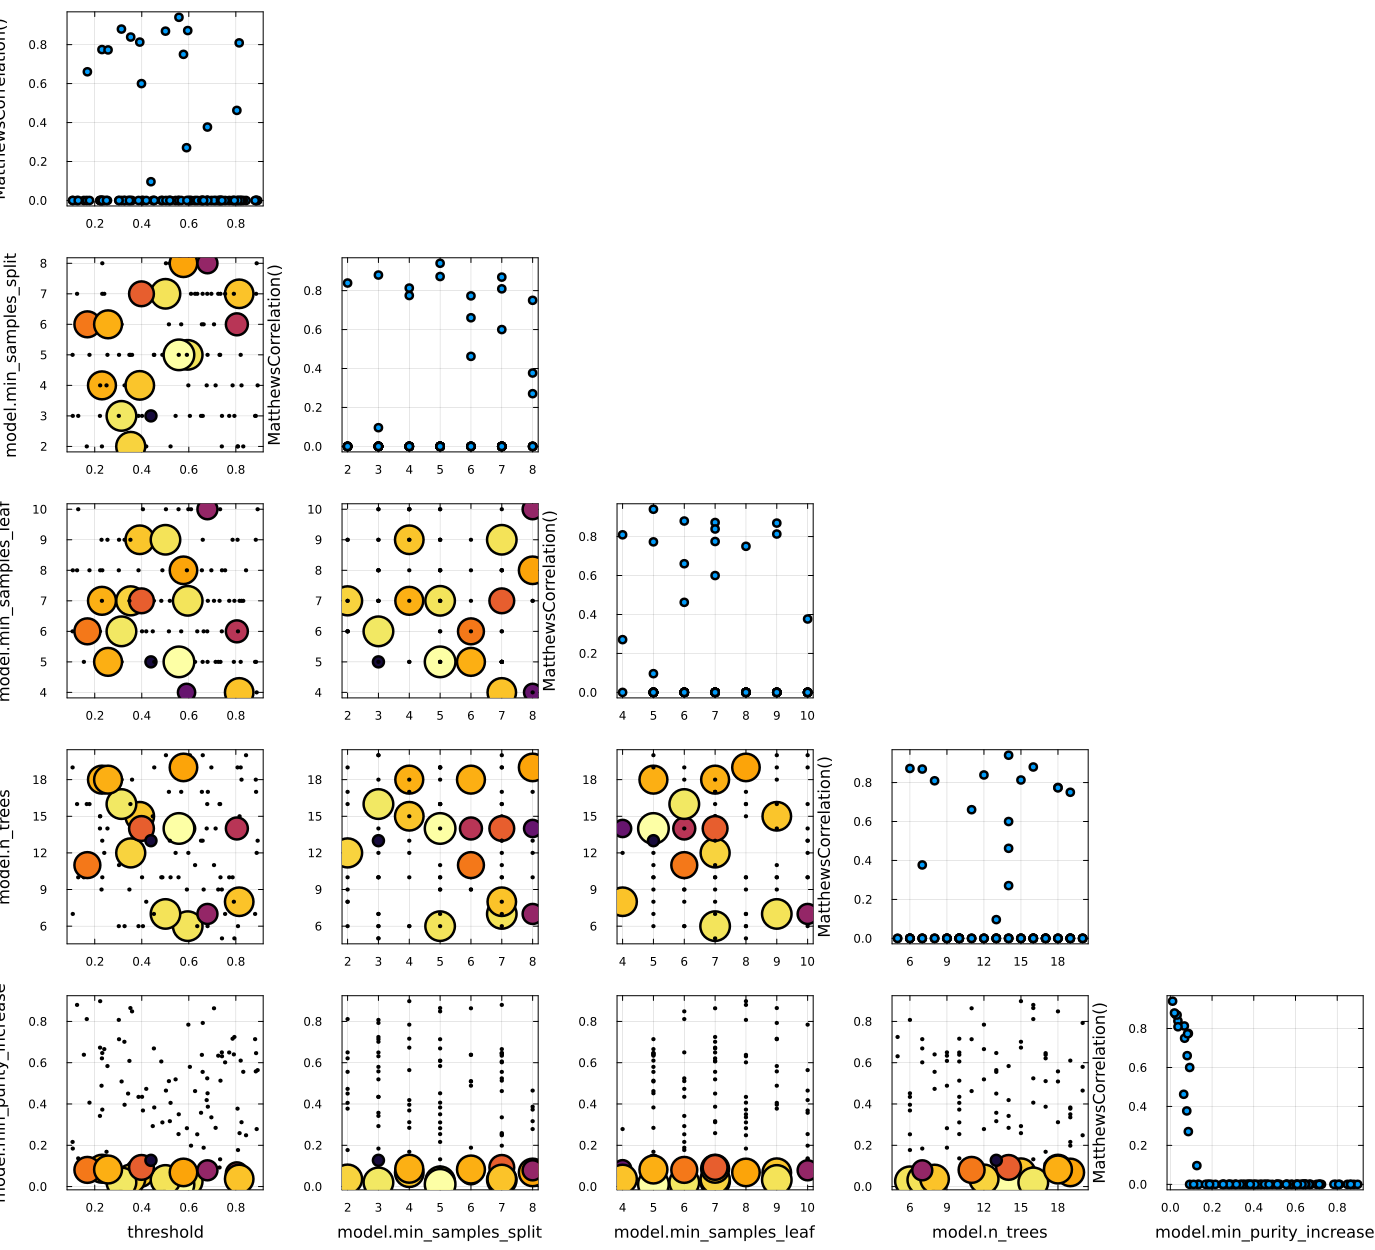

In [14]:
using Plots
plot(tuned_mach)

In [15]:
#MLJ.feature_importances(tuned_mach.model.model.model, tuned_mach.fitresult , report(tuned_mach))
#impurity_importance(tuned_mach.model.model.model)
fitted_params(tuned_mach)[1].model

RandomForestClassifier(
  max_depth = -1, 
  min_samples_leaf = 5, 
  min_samples_split = 5, 
  min_purity_increase = 0.010811418392443373, 
  n_subfeatures = -1, 
  n_trees = 14, 
  sampling_fraction = 0.7, 
  feature_importance = :impurity, 
  rng = Random._GLOBAL_RNG())

In [16]:
m = MatthewsCorrelation()
m(mode.(y_hat), y_test)

UndefVarError: UndefVarError: `y_hat` not defined

In [17]:
mlj_m = tuned_mach.model.model.model

RandomForestClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = -1, 
  n_trees = 100, 
  sampling_fraction = 0.7, 
  feature_importance = :impurity, 
  rng = Random._GLOBAL_RNG())

In [18]:
convert(DecisionTree.RandomForestClassifier, mlj_m)

MethodError: MethodError: Cannot `convert` an object of type MLJDecisionTreeInterface.RandomForestClassifier to an object of type DecisionTree.RandomForestClassifier

Closest candidates are:
  convert(::Type{T}, !Matched::T) where T
   @ Base Base.jl:84


In [19]:
MLJ.save("model20250407.jls", tuned_mach)

In [21]:
y_hat

UndefVarError: UndefVarError: `y_hat` not defined